CALCULATING INVESTOR'S RETURNS ACCESSING THEIR RISK AVERSION INDEX

In [44]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [45]:
print("Hello, Investor")
capital = float(input("What amount of funds you want to invest?\n"))

Hello, Investor
What amount of funds you want to invest?
10000000


In [46]:
print("Here are some questions to access your risk profile!")

Here are some questions to access your risk profile!


QUESTIONS TAKEN FROM CFA INSTITUTE INVESTMENT RISK PROFILING:
A GUIDE FOR FINANCIAL ADVISORS

In [47]:
def get_score(question, options):
    print(question)
    for i, option in enumerate(options, 1):
        print(f"{i}. {option}")
    while True:
        try:
            choice = int(input("Enter the number corresponding to your choice: "))
            if 1 <= choice <= 51:
                return choice
            else:
                print("Invalid input. Please enter a number between 1 and", len(options))
        except ValueError:
            print("Invalid input. Please enter a valid number.")

questions = [
    ("What is your risk tolerance or willingness to take financial risk?",
     ["Very Low", "Low", "Moderate", "High", "Very High"]),

    ("What is your preference when holding risky assets?",
     ["Maximize Safety", "Mostly Safety", "Mix of Safety and Return", "Mostly Return", "Maximize Return"]),

    ("How knowledgeable are you about financial and investment concepts?",
     ["Not at All Knowledgeable", "Minimally Knowledgeable", "Moderately Knowledgeable", "Competent", "Very Knowledgeable"]),

    ("How much experience do you have with investment products?",
     ["None", "Very Little", "Some", "Modest", "Extensive"]),

    ("What is your perception of the riskiness of the stock market?",
     ["Very Risky", "Somewhat Risky", "Neutral", "Somewhat Safe", "Very Safe"]),

    ("In the past, when faced with investment losses, what action did you take?",
     ["Sold Investment", "Did Nothing", "Purchased More"])
]
1
total_score = sum(get_score(q, options) for q, options in questions)

if total_score>26:
   A = 0.5
elif total_score>21:
   A = 1
elif total_score>19:
   A = 1.5
elif total_score>17:
   A = 2
elif total_score>15:
   A = 2.5
elif total_score>13:
   A = 3
elif total_score>11:
   A = 3.5
elif total_score>9:
   A = 4
elif total_score>7:
   A = 4.5
elif total_score>0:
   A = 5

print(f"Value of risk aversion index A : {A}")

What is your risk tolerance or willingness to take financial risk?
1. Very Low
2. Low
3. Moderate
4. High
5. Very High
Enter the number corresponding to your choice: 5
What is your preference when holding risky assets?
1. Maximize Safety
2. Mostly Safety
3. Mix of Safety and Return
4. Mostly Return
5. Maximize Return
Enter the number corresponding to your choice: 4
How knowledgeable are you about financial and investment concepts?
1. Not at All Knowledgeable
2. Minimally Knowledgeable
3. Moderately Knowledgeable
4. Competent
5. Very Knowledgeable
Enter the number corresponding to your choice: 4
How much experience do you have with investment products?
1. None
2. Very Little
3. Some
4. Modest
5. Extensive
Enter the number corresponding to your choice: 5
What is your perception of the riskiness of the stock market?
1. Very Risky
2. Somewhat Risky
3. Neutral
4. Somewhat Safe
5. Very Safe
Enter the number corresponding to your choice: 3
In the past, when faced with investment losses, what 

WE WILL SELECT 2 STOCKS FOR INVESTOR WHICH ARE ANALYSED BEFORE AND HAVE HUGE POTENTIAL FUNDAMENTALLY

In [48]:
#INSTITUTION SELECTED STOCK
s1 = input(" Enter ticker for stock 1(according to Yahoo finance):\n")
s2 = input(" Enter ticker for stock 2(according to Yahoo finance):\n")
m ="^NSEI"
stock1 = yf.Ticker(s1)
stock2 = yf.Ticker(s2)
market = yf.Ticker(m)

 Enter ticker for stock 1(according to Yahoo finance):
ICICIBANK.NS
 Enter ticker for stock 2(according to Yahoo finance):
ITC.NS


Storing the daily close price data for past 5 years

In [49]:
stock1_data = stock1.history(period="5y", interval="1d", auto_adjust=True)[['Close']]
stock2_data = stock2.history(period="5y", interval="1d", auto_adjust=True)[['Close']]
market_data = market.history(period="5y", interval="1d", auto_adjust=True)[['Close']]

Calculaing daily percentage returns

In [50]:
stock1_data['Return'] = stock1_data['Close'].pct_change() * 100
stock2_data['Return'] = stock2_data['Close'].pct_change() * 100
market_data['Market Return'] = market_data['Close'].pct_change() * 100

Droping NaN values to ensure alignment of data

In [51]:
stock1_data.dropna(inplace=True)
stock2_data.dropna(inplace=True)
market_data.dropna(inplace=True)

Aligning the data

In [52]:
aligned_data = pd.concat([stock1_data['Return'], stock2_data['Return'], market_data['Market Return']], axis=1, join='inner')
aligned_data.columns = ['stock1_return', 'stock2_return', 'market_return']

In [53]:
stock1_returns = aligned_data['stock1_return'].values
stock2_returns = aligned_data['stock2_return'].values
market_returns = aligned_data['market_return'].values

Calculating beta using linear regression

In [54]:
beta1, alpha1, r1, p1, std_err1 = linregress(market_returns, stock1_returns)
beta2, alpha2, r2, p2, std_err2 = linregress(market_returns, stock2_returns)

Variables for CAPM model

In [55]:
expected_return_market = ((1 + market_data['Market Return'].mean()/100)**252 - 1)*100
print(f"Expected Return of Market : {expected_return_market:.3f}%")
rf = 6.20

Expected Return of Market : 27.421%


Applying CAPM Model

In [56]:
expected_return_stock1 = rf + beta1 * (expected_return_market - rf)
expected_return_stock2 = rf + beta2 * (expected_return_market - rf)
print(f"Expected Return {s1} : {expected_return_stock1:.3f}%")
print(f"Expected Return {s2} : {expected_return_stock2:.3f}%")

Expected Return ICICIBANK.NS : 34.071%
Expected Return ITC.NS : 18.790%


In [57]:
sigma_stock1=stock1_data['Return'].std() * np.sqrt(252)
sigma_stock2=stock2_data['Return'].std() * np.sqrt(252)
print(f"Standard Deviation of {s1} : {sigma_stock1:.2f}%")
print(f"Standard Deviation of {s2} : {sigma_stock2:.2f}%")

Standard Deviation of ICICIBANK.NS : 29.32%
Standard Deviation of ITC.NS : 23.36%


In [58]:
var_stock2=sigma_stock2**2
var_stock1=sigma_stock1**2

Calculating correlation between both stocks

In [59]:
correlation_12=stock1_data['Return'].corr(stock2_data['Return'])
print(f"Correlation between {s1} and {s2} : {correlation_12:.3f}")

Correlation between ICICIBANK.NS and ITC.NS : 0.261


Calculating Weights of stocks using Minimum Variance portfolio

In [60]:
w1min = ((var_stock2) - (correlation_12 * sigma_stock1 * sigma_stock2)) / (var_stock1 + var_stock2 - 2 * correlation_12 * sigma_stock1 * sigma_stock2)
w2min = 1 - w1min

print(f"Weight of {s1}: {w1min:.3%}")
print(f"Weight of {s2}: {w2min:.3%}")


Weight of ICICIBANK.NS: 35.031%
Weight of ITC.NS: 64.969%


Expected Annualized Return of portfolio

In [61]:
expected_return_portfolio = w1min * expected_return_stock1 + w2min * expected_return_stock2
print(f"Expected Annualized Return of Portfolio : {expected_return_portfolio:.3f}%")

Expected Annualized Return of Portfolio : 24.144%


Volatility of portfolio = sigma_portfolio

In [62]:
sigma_portfolio = np.sqrt( (w1min**2 * sigma_stock1**2 + w2min**2 * sigma_stock2**2 + 2 * correlation_12 * sigma_stock1 * sigma_stock2 * w1min * w2min))
print(f"Volatility of Portfolio : {sigma_portfolio:.3f}%")

Volatility of Portfolio : 20.427%


Capital allocation in both risk free asset and risky portfolio

Using Utility function U = E(Rc) - A*sigma_c^2/2 (c is complete portfolio)

E(Rc) = y*E(Rp) + (1-y)*rf

And, sigma_c = y*sigma_p

So, U = rf + y*[E(Rp) - rf] - A*(y*sigma_portfolio)^2/2

Maximising utility function we get; y = (E(Rp) - rf)/(A*sigma_portfolio^2)

In [63]:
y = (expected_return_portfolio - rf)/(A * sigma_portfolio**2)
expected_return_portfolio_c = y * expected_return_portfolio + (1-y)*rf



Volatility of complete portfolio

In [64]:
sigma_portfolio_c = y * sigma_portfolio


Calculation of Sharpe Ratio

In [65]:
sharpe_ratio = (expected_return_portfolio - rf) / sigma_portfolio
print(f"Sharpe Ratio of Complete Portfolio : {sharpe_ratio:.3f}")

Sharpe Ratio of Complete Portfolio : 0.878


Providing the portfolio depending upon

Expected Annualized Return of Portfolio : 24.144%
Expected Portfolio Value : ₹ 12414353
Weight allotted to ICICIBANK.NS: ₹ 3503127
Weight allotted to ITC.NS: ₹ 6496873
Volatility of the portfolio is 20.427%


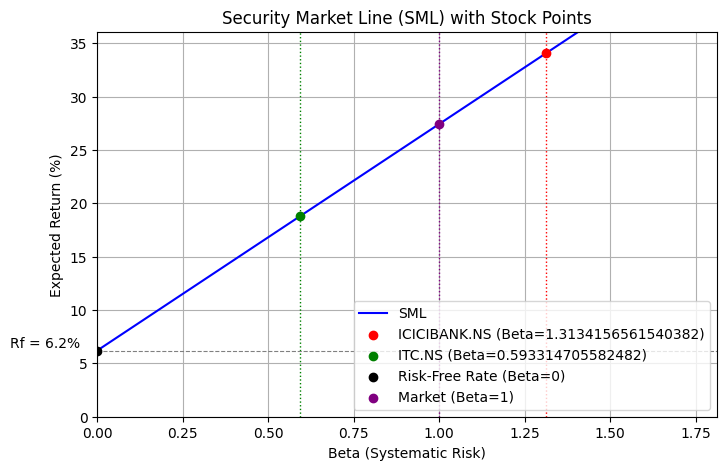

In [66]:
if A < 2.5:
  w1min_p = w1min*capital
  w2min_p = w2min*capital
  print(f"Expected Annualized Return of Portfolio : {expected_return_portfolio:.3f}%")
  portfolio_value_p = capital*(1+expected_return_portfolio/100)
  print(f"Expected Portfolio Value : ₹ {portfolio_value_p:.0f}")
  print(f"Weight allotted to {s1}: ₹ {w1min_p:.0f}")
  print(f"Weight allotted to {s2}: ₹ {w2min_p:.0f}")
  print(f"Volatility of the portfolio is {sigma_portfolio:.3f}%")
  def line_equation(beta_values, beta1, er1, beta2, er2, rf):
    slope = (er2 - er1) / (beta2 - beta1)
    return rf + slope * beta_values


  beta_values_custom = np.linspace(0, max(beta1, beta2) + 0.5, 100)
  expected_returns_custom = line_equation(beta_values_custom, beta1, expected_return_stock1, beta2, expected_return_stock2, rf)

  plt.figure(figsize=(8, 5))
  plt.plot(beta_values_custom, expected_returns_custom, color='b', linestyle='-', label="SML")
  plt.scatter(beta1, expected_return_stock1, color='r', marker='o', label=f"{s1} (Beta={beta1})", zorder=3)
  plt.scatter(beta2, expected_return_stock2, color='g', marker='o', label=f"{s2} (Beta={beta2})", zorder=3)

  plt.scatter(0, rf, color='black', marker='o', label=f"Risk-Free Rate (Beta=0)", zorder=3)
  plt.text(-0.05, rf, f"Rf = {rf}%", verticalalignment='bottom', horizontalalignment='right', fontsize=10, color='black')


  expected_return_at_beta1 = line_equation(1, beta1, expected_return_stock1, beta2, expected_return_stock2, rf)
  plt.axvline(x=1, color='purple', linestyle='dotted', linewidth=1)
  plt.scatter(1, expected_return_at_beta1, color='purple', marker='o', label=f"Market (Beta=1)", zorder=3)


  plt.axvline(x=beta1, color='r', linestyle='dotted', linewidth=1)
  plt.axvline(x=beta2, color='g', linestyle='dotted', linewidth=1)

  plt.xlabel("Beta (Systematic Risk)")
  plt.ylabel("Expected Return (%)")
  plt.title("Security Market Line (SML) with Stock Points")


  plt.xlim(0, max(beta1, beta2) + 0.5)
  plt.ylim(0, max(expected_return_stock1, expected_return_stock2) ++ 2)
  plt.axhline(y=rf, color='gray', linestyle='--', linewidth=0.8)

  plt.legend()
  plt.grid()
  plt.show()

elif A >= 2.5 :
  y_c = y * capital
  yrf_c = (1-y)*capital
  print(f"Expected Annualized Return of Complete Portfolio : {expected_return_portfolio_c:.3f}%")
  portfolio_value_c = capital*(1+expected_return_portfolio_c/100)
  print(f"Expected Portfolio Value : ₹ {portfolio_value_c:.0f}")
  print(f"Capital allocation to risky portfolio : ₹ {y_c:.0%}")
  print(f"Capital allocation to risk free asset : ₹ {yrf_c:.0%}")
  print(f"Volatility of the portfolio is {sigma_portfolio_c:.3f}%")
  print(f"Sharpe ratio of portfolio : {sharpe_ratio}")
  w1min_c = w1min*y_c
  w2min_c = w2min*y_c
  print(f"Weight allotted to {s1}: ₹ {w1min_c:.0f}")
  print(f"Weight allotted to {s2}: ₹ {w2min_c:.0f}")
  sigma_values = np.linspace(0, sigma_portfolio * 1.5, 100)


  expected_returns = rf + sharpe_ratio * sigma_values

  plt.figure(figsize=(8, 5))
  plt.plot(sigma_values, expected_returns, label="Capital Allocation Line (CAL)", color='blue')


  plt.scatter(0, rf, color='red', label="Risk-Free Rate ($r_f$)")
  plt.text(0, rf, f"  $r_f$ = {rf/100:.2%}", verticalalignment='bottom', fontsize=12, color='red')


  plt.scatter(sigma_portfolio, rf + sharpe_ratio * sigma_portfolio, color='green', label="Tangency Portfolio")
  plt.text(sigma_portfolio, rf + sharpe_ratio * sigma_portfolio, "  Tangency Portfolio", verticalalignment='bottom', fontsize=12, color='green')


  plt.xlim(0, sigma_portfolio * 1.5)
  plt.ylim(0, max(expected_returns) * 1.1)

  plt.xlabel("Portfolio Risk (Standard Deviation)")
  plt.ylabel("Expected Return, E(R)")
  plt.title("Capital Allocation Line (CAL)")
  plt.axhline(y=rf, color='gray', linestyle='dotted')
  plt.legend()
  plt.grid()
  plt.show()

VaR Calculation

Historical VaR (99%) for ICICIBANK.NS: -4.95%
Historical VaR (99%) for ITC.NS: -3.45%
Historical VaR (99%) for Market Index: -2.83%


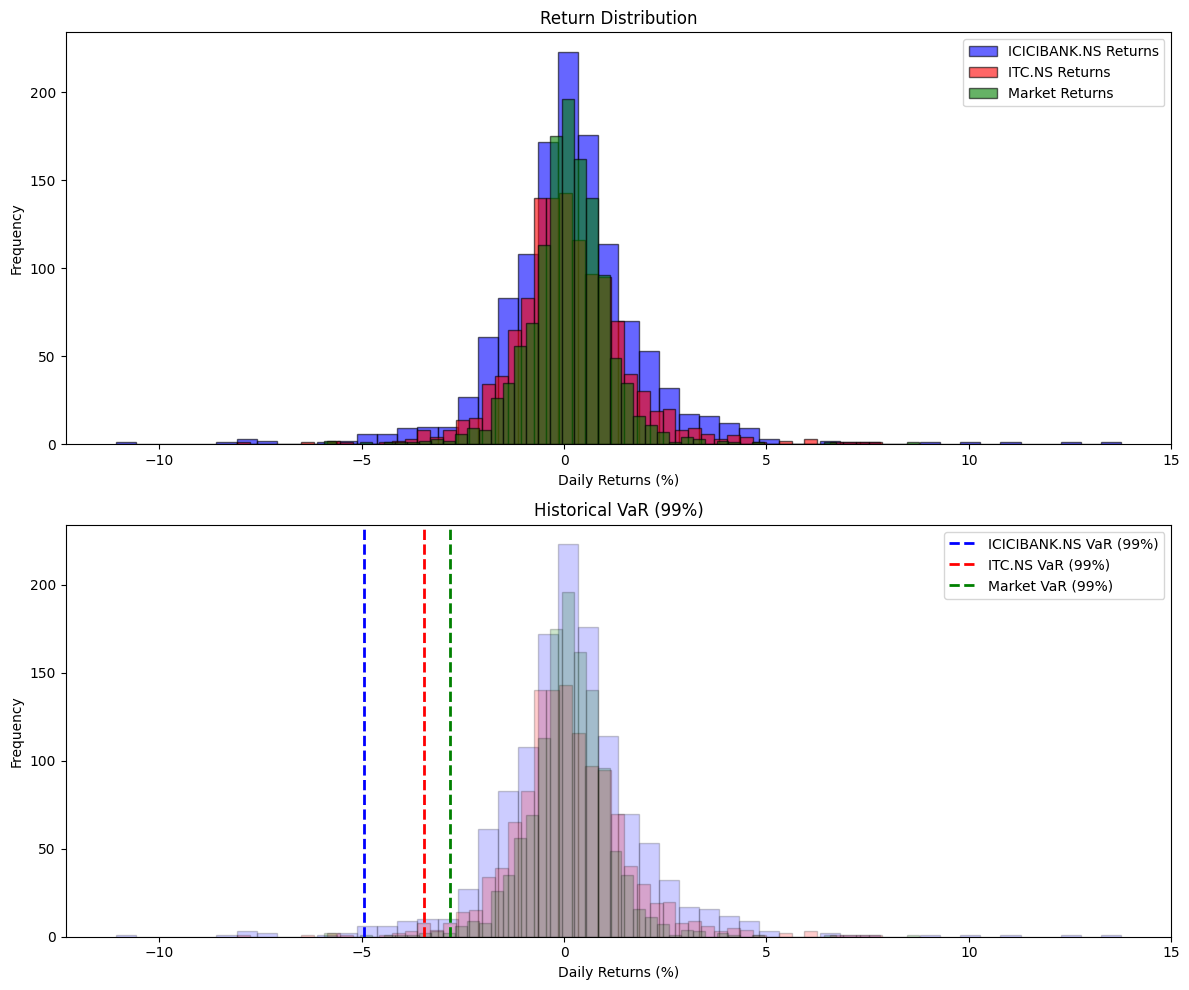

In [67]:
def historical_var(returns, confidence_level=0.99):

    var_threshold = 100 * (1 - confidence_level)
    return np.percentile(returns, var_threshold)


var_stock1 = historical_var(stock1_returns)
var_stock2 = historical_var(stock2_returns)
var_market = historical_var(market_returns)


print(f"Historical VaR (99%) for {s1}: {var_stock1:.2f}%")
print(f"Historical VaR (99%) for {s2}: {var_stock2:.2f}%")
print(f"Historical VaR (99%) for Market Index: {var_market:.2f}%")


fig, axes = plt.subplots(2, 1, figsize=(12, 10))

axes[0].hist(stock1_returns, bins=50, alpha=0.6, color='blue', label=f'{s1} Returns', edgecolor='black')
axes[0].hist(stock2_returns, bins=50, alpha=0.6, color='red', label=f'{s2} Returns', edgecolor='black')
axes[0].hist(market_returns, bins=50, alpha=0.6, color='green', label='Market Returns', edgecolor='black')
axes[0].set_xlabel('Daily Returns (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Return Distribution')
axes[0].legend()


axes[1].axvline(var_stock1, color='blue', linestyle='dashed', linewidth=2, label=f'{s1} VaR (99%)')
axes[1].axvline(var_stock2, color='red', linestyle='dashed', linewidth=2, label=f'{s2} VaR (99%)')
axes[1].axvline(var_market, color='green', linestyle='dashed', linewidth=2, label='Market VaR (99%)')
axes[1].hist(stock1_returns, bins=50, alpha=0.2, color='blue', edgecolor='black')
axes[1].hist(stock2_returns, bins=50, alpha=0.2, color='red', edgecolor='black')
axes[1].hist(market_returns, bins=50, alpha=0.2, color='green', edgecolor='black')
axes[1].set_xlabel('Daily Returns (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Historical VaR (99%)')
axes[1].legend()

plt.tight_layout()
plt.show()

Accuracy of VaR (Standard error)

In [71]:
from scipy.stats import gaussian_kde


confidence_level = 0.99
alpha = 1 - confidence_level


n = len(stock1_returns)
kde = gaussian_kde(stock1_returns)
var_stock1 = np.percentile(stock1_returns, alpha * 100)
f_x = kde.evaluate(var_stock1)[0]


q = alpha
var_accuracy_stock1 = (1 / f_x) * np.sqrt(((1 - q) * q) / n)


relative_se_stock1 = (var_accuracy_stock1 / abs(var_stock1)) * 100


n2 = len(stock2_returns)
kde2 = gaussian_kde(stock2_returns)
var_stock2 = np.percentile(stock2_returns, alpha * 100)
f_x2 = kde2.evaluate(var_stock2)[0]

var_accuracy_stock2 = (1 / f_x2) * np.sqrt(((1 - q) * q) / n2)
relative_se_stock2 = (var_accuracy_stock2 / abs(var_stock2)) * 100


print(f"Standard Error of VaR for Stock 1: {var_accuracy_stock1:.2f}")
print(f"Relative Standard Error of VaR for Stock 1: {relative_se_stock1:.2f}%")

print(f"Standard Error of VaR for Stock 2: {var_accuracy_stock2:.2f}")
print(f"Relative Standard Error of VaR for Stock 2: {relative_se_stock2:.2f}%")


Standard Error of VaR for Stock 1: 0.35
Relative Standard Error of VaR for Stock 1: 7.17%
Standard Error of VaR for Stock 2: 0.20
Relative Standard Error of VaR for Stock 2: 5.80%
